# Import Libraries

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

# Feature Scaling
from sklearn.preprocessing import StandardScaler

#Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report

In [88]:
#Import Data
my_data = pd.read_csv('churn.csv')

In [89]:
my_data.describe()

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,80281.447750,85.979550,23.898650,493155.264250,389.615100,8.000700,6.002250
std,41680.586319,85.992324,26.816645,252407.884692,213.820682,8.925418,4.402558
min,20007.000000,-2.000000,0.000000,150002.000000,130.000000,0.000000,1.000000
25%,42217.000000,0.000000,0.000000,263714.250000,219.000000,1.000000,2.000000
50%,75366.500000,59.000000,14.000000,452259.500000,326.000000,4.000000,5.000000
75%,115881.750000,179.000000,41.000000,702378.000000,533.250000,15.000000,10.000000
max,159983.000000,335.000000,89.000000,999996.000000,899.000000,29.000000,15.000000


In [90]:
my_data.describe(include=['O'])

,COLLEGE,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
count,20000,20000,20000,20000,20000
unique,2,5,5,5,2
top,one,very_unsat,little,considering,STAY
freq,10048,7909,7875,7920,10148


# Check for Missing Values

No missing values are in the data. Imputation is not required.

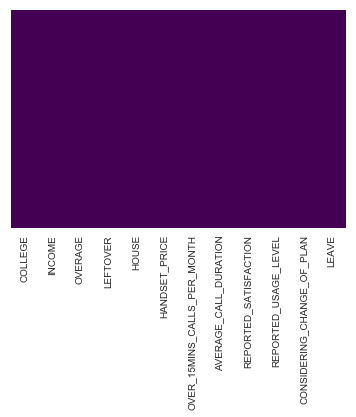

In [91]:
#Check for missing values
sns.heatmap(my_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Check for Bias in the Output Variable

There is no bias found in the output variable

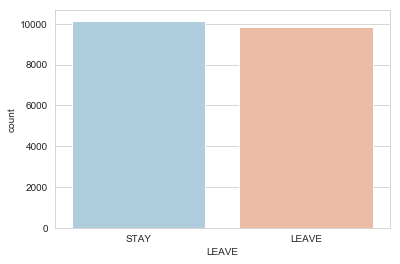

In [92]:
sns.set_style('whitegrid')
sns.countplot(x='LEAVE',data=my_data,palette='RdBu_r')

# Encode Variables

In [93]:
my_data['LEAVE'] = np.where(my_data['LEAVE'] == 'STAY', 1, 0)
my_data['COLLEGE'] = np.where(my_data['COLLEGE'] == 'one', 1, 0)

# Pair Plots and Histograms

From the histograms we can see that data is heavily positive skewed.
Handling the skewness will improve the model performance

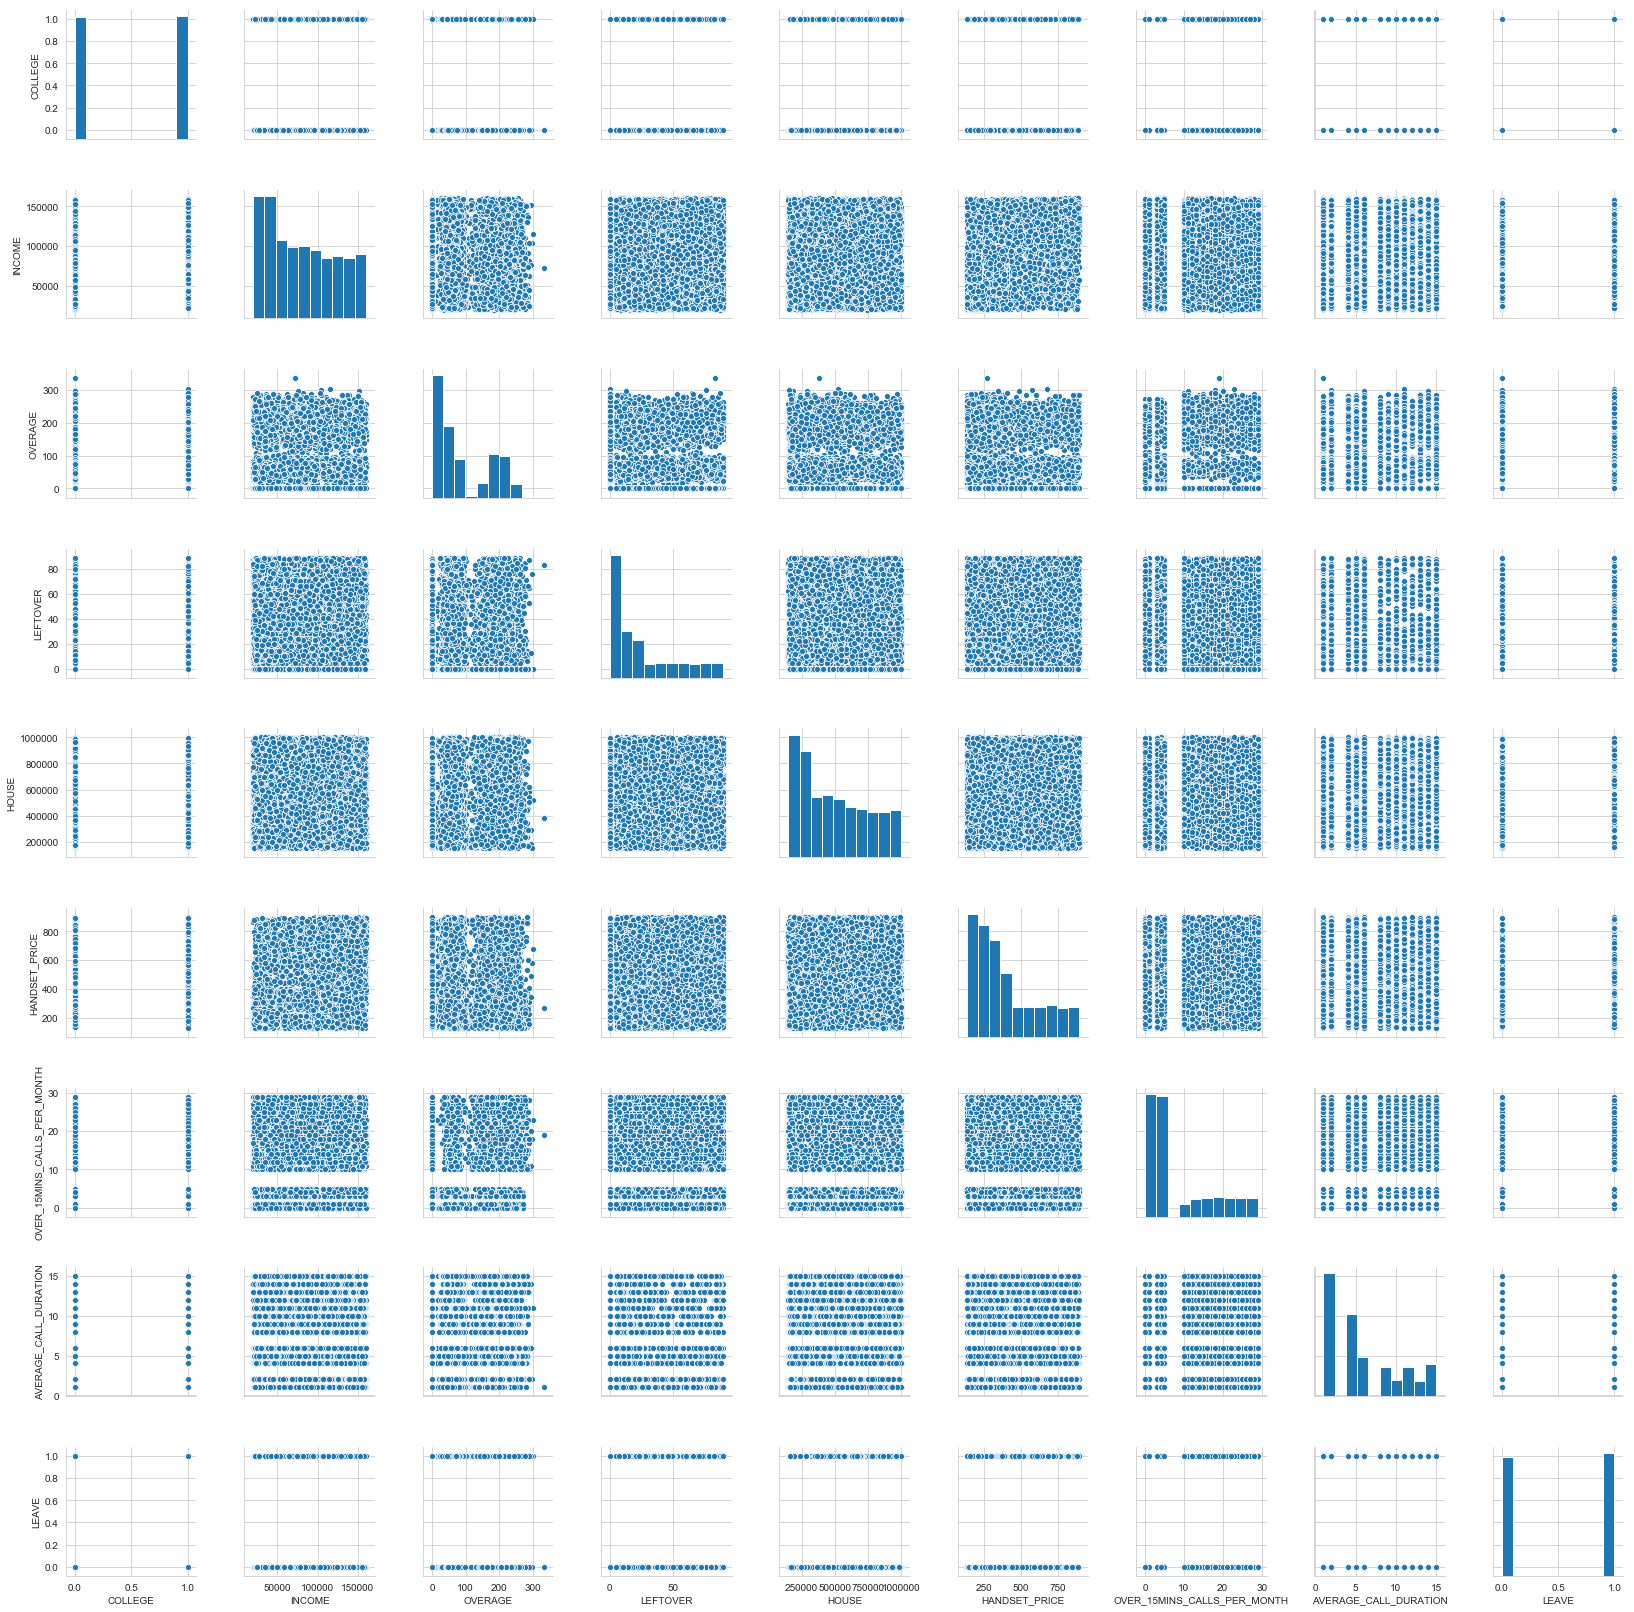

In [94]:
sns.pairplot(my_data)

In [95]:
#Split the data between dependant and independant variables
X = my_data.iloc[:, 0:-1]
y = my_data.iloc[:, -1]

In [96]:
#Create dummy columns for the categorical variables
X = pd.get_dummies(X, prefix_sep='_', drop_first=True)

# Find correlation between input and output variables

Drop the columns with low correlation

In [97]:
def filter_features_by_cor(df):
    df_return = pd.DataFrame()
    for i in range(df.shape[1]):
        new_df = pd.Series([df.iloc[:,i].corr(df.iloc[:,-1]),df.columns[i]])
        df_return = df_return.append(new_df, ignore_index = True)
    df_return = df_return.sort_values(by = [0], ascending = False)
    df_return = df_return.reset_index(drop = True)
    
    return df_return

In [98]:
df = X
df['LEAVE'] = y
corr_df = filter_features_by_cor(df)
print(corr_df)

           0                                         1
0   1.000000                                     LEAVE
1   0.211213                                     HOUSE
2   0.012661                 REPORTED_SATISFACTION_sat
3   0.008704                     AVERAGE_CALL_DURATION
4   0.005586  CONSIDERING_CHANGE_OF_PLAN_never_thought
5   0.004628            REPORTED_SATISFACTION_very_sat
6   0.004579    CONSIDERING_CHANGE_OF_PLAN_considering
7   0.004400                 REPORTED_USAGE_LEVEL_high
8   0.004345               REPORTED_USAGE_LEVEL_little
9  -0.003557          REPORTED_USAGE_LEVEL_very_little
10 -0.004427            REPORTED_USAGE_LEVEL_very_high
11 -0.005950             CONSIDERING_CHANGE_OF_PLAN_no
12 -0.009210          REPORTED_SATISFACTION_very_unsat
13 -0.009768               REPORTED_SATISFACTION_unsat
14 -0.009983        CONSIDERING_CHANGE_OF_PLAN_perhaps
15 -0.014673                                   COLLEGE
16 -0.060540                                  LEFTOVER
17 -0.0892

In [99]:
#Dropping columns with low correlation

corr_df = corr_df.drop([2,3,4,5,6,7,8,9,10,11,12,13,14])
df = df[corr_df.iloc[:,1].values]

X = df.iloc[:, 1:9]
y = df.iloc[:, 0]

In [100]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [101]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [102]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Consufion Matrix")
print(cm)

#Classification Report
print()
print("Classification Report")
print(classification_report(y_test,y_pred))

Consufion Matrix
[[1524  900]
 [ 856 1720]]

Classification Report
             precision    recall  f1-score   support

          0       0.64      0.63      0.63      2424
          1       0.66      0.67      0.66      2576

avg / total       0.65      0.65      0.65      5000



# Decision Tree

In [103]:
# Fitting Decision Tree Classification to the Training set
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Consufion Matrix")
print(cm)

#Classification Report
print()
print("Classification Report")
print(classification_report(y_test,y_pred))

Consufion Matrix
[[1552  872]
 [ 978 1598]]

Classification Report
             precision    recall  f1-score   support

          0       0.61      0.64      0.63      2424
          1       0.65      0.62      0.63      2576

avg / total       0.63      0.63      0.63      5000



# K-Nearest Neighbour

Text(0,0.5,'Error Rate')

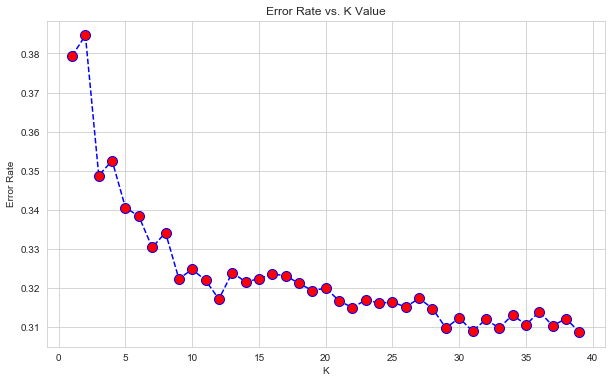

In [104]:
#K-Nearest Neighbour
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [105]:
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Consufion Matrix")
print(cm)

#Classification Report
print()
print("Classification Report")
print(classification_report(y_test,y_pred))

Consufion Matrix
[[1683  741]
 [ 804 1772]]

Classification Report
             precision    recall  f1-score   support

          0       0.68      0.69      0.69      2424
          1       0.71      0.69      0.70      2576

avg / total       0.69      0.69      0.69      5000



# Support Vector Machine

In [108]:
svc_model = SVC()
svc_model.fit(X_train,y_train)
y_pred = svc_model.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Consufion Matrix")
print(cm)

#Classification Report
print()
print("Classification Report")
print(classification_report(y_test,y_pred))

Consufion Matrix
[[1595  829]
 [ 730 1846]]

Classification Report
             precision    recall  f1-score   support

          0       0.69      0.66      0.67      2424
          1       0.69      0.72      0.70      2576

avg / total       0.69      0.69      0.69      5000



# Performing K-fold Cross Validation will avoid over-fitting

# ROC will provide a better understanding on Model performance